# Interpreting ResNet Model With Smooth Gradients

This notebook loads the pretrained ResNet model given by [PaddleClas](https://github.com/PaddlePaddle/PaddleClas/tree/release/2.0) and performs image classification on selected images. 

Interpretations of the predictions are generated and visualized using Consensus algorithm, specifically the `ConsensusInterpreter` class.

In [1]:
import paddle
import interpretdl as it

Before interpreting the image, we first take a look at the original image.

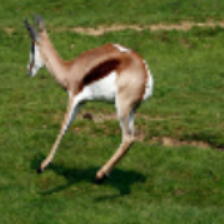

In [2]:
from PIL import Image
from interpretdl.data_processor.readers import read_image

img_path = 'assets/deer.png'
x = Image.fromarray(read_image(img_path)[0])
x

In [3]:
import interpretdl as it
from paddle.vision.models import resnet34, resnet50, resnet101, mobilenet_v2

# Here we use four models to give an illustration. Using more models shows more impressive results.
list_models = {'resnet34': resnet34, 'resnet50': resnet50, 'resnet101': resnet101, 'mobilenet_v2': mobilenet_v2}
consensus = it.ConsensusInterpreter(it.SmoothGradInterpreter, list_models.values(), device='gpu:0')

In [4]:
img_path = '/root/codespace/InterpretDL/tutorials/assets/deer.png'
exp = consensus.interpret(img_path)

W1214 21:56:31.630419 21561 device_context.cc:447] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 10.2
W1214 21:56:31.637041 21561 device_context.cc:465] device: 0, cuDNN Version: 7.6.
/opt/conda/envs/pp2/lib/python3.7/site-packages/paddle/nn/layer/norm.py:653: UserWarning: When training, we now always track global mean and variance.
  "When training, we now always track global mean and variance.")
/opt/conda/envs/pp2/lib/python3.7/site-packages/paddle/fluid/dygraph/varbase_patch_methods.py:392: UserWarning: 
tensor.grad will return the tensor value of the gradient. This is an incompatible upgrade for tensor.grad API.  It's return type changes from numpy.ndarray in version 2.0 to paddle.Tensor in version 2.1.0.  If you want to get the numpy value of the gradient, you can use :code:`x.grad.numpy()` 
  warnings.warn(warning_msg)
100%|██████████| 50/50 [00:02<00:00, 20.43it/s]


Text(0.5, 1.0, 'Consensus')

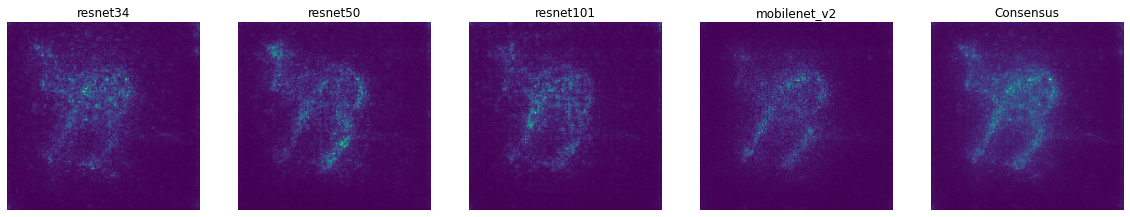

In [6]:
import numpy as np
import matplotlib.pyplot as plt

cols = len(list_models) + 1
psize = 4
fig, ax = plt.subplots(1, cols, figsize=(cols*psize, 1*psize))

for axis in ax:
    axis.axis('off')

for i in range(len(list_models)):
    ax[i].imshow(np.abs(exp[i]).sum(0))
    ax[i].set_title(list(list_models.keys())[i])

ax[-1].imshow(np.abs(exp).sum(1).mean(0))
ax[-1].set_title('Consensus')